In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import networkx as nx
import squarify

In [4]:
iris = pd.read_csv("Iris.csv") 
adult = pd.read_csv("adult.csv")

In [7]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


**1D Data visualization**


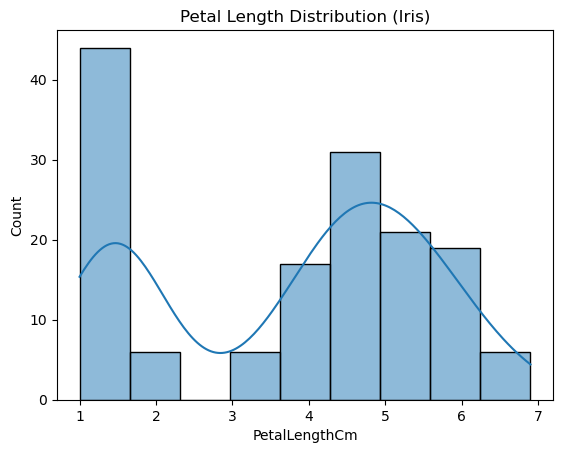

In [12]:
# Iris: Distribution of petal length
sns.histplot(iris["PetalLengthCm"], kde=True)
plt.title("Petal Length Distribution (Iris)")
plt.show()


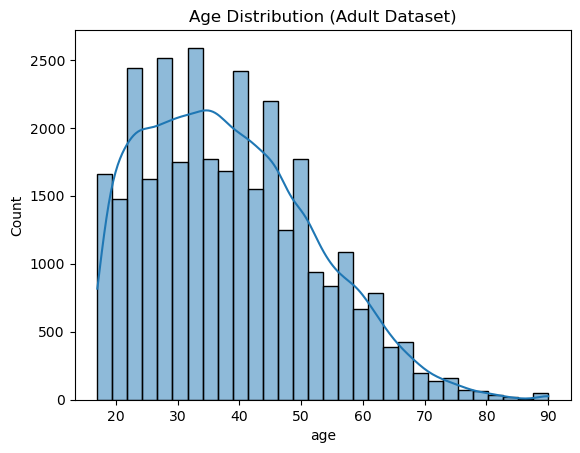

In [14]:
# Adult: Distribution of age
sns.histplot(adult["age"], kde=True, bins=30)
plt.title("Age Distribution (Adult Dataset)")
plt.show()


**2D (Planar) Data Visualization**

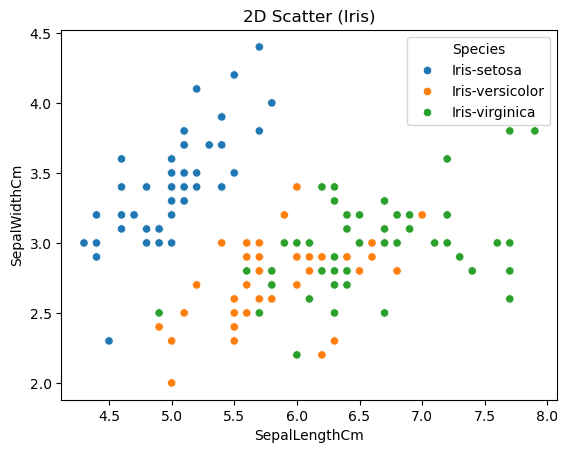

In [15]:
# Iris: Sepal length vs Sepal width
sns.scatterplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", hue="Species")
plt.title("2D Scatter (Iris)")
plt.show()

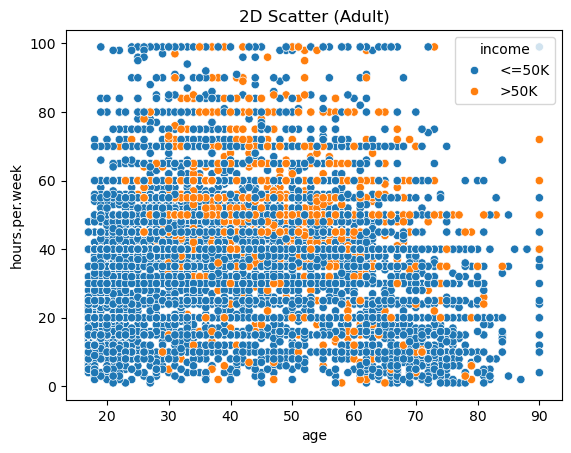

In [17]:
# Adult: Age vs Hours-per-week
sns.scatterplot(data=adult, x="age", y="hours.per.week", hue="income")
plt.title("2D Scatter (Adult)")
plt.show()

**3D (Volumetric) Data Visualization**

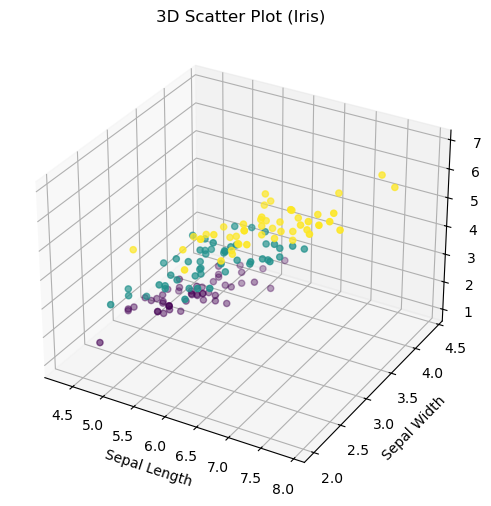

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], iris['PetalLengthCm'], c=iris['Species'].astype('category').cat.codes)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
plt.title("3D Scatter Plot (Iris)")
plt.show()




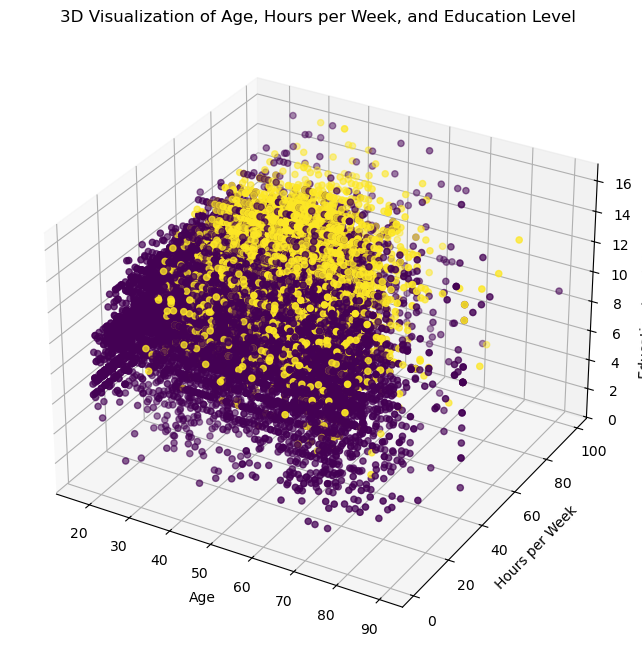

In [30]:
X = adult[['age', 'hours.per.week', 'education.num']]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['age'], X['hours.per.week'], X['education.num'], c=(adult['income'] == '>50K'), cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Hours per Week')
ax.set_zlabel('Education Level (Numeric)')
ax.set_title('3D Visualization of Age, Hours per Week, and Education Level')
plt.show()


**Temporal Data Visualization**

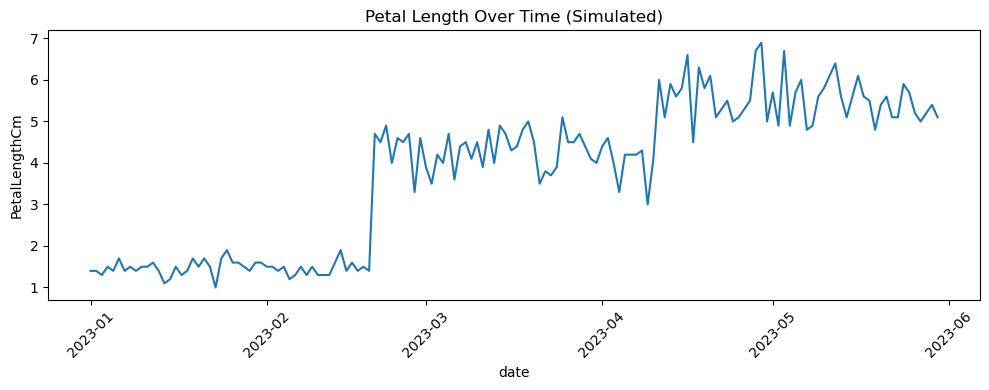

In [32]:
iris['date'] = pd.date_range(start='2023-01-01', periods=len(iris), freq='D')
plt.figure(figsize=(10, 4))
sns.lineplot(data=iris, x='date', y='PetalLengthCm')
plt.title("Petal Length Over Time (Simulated)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

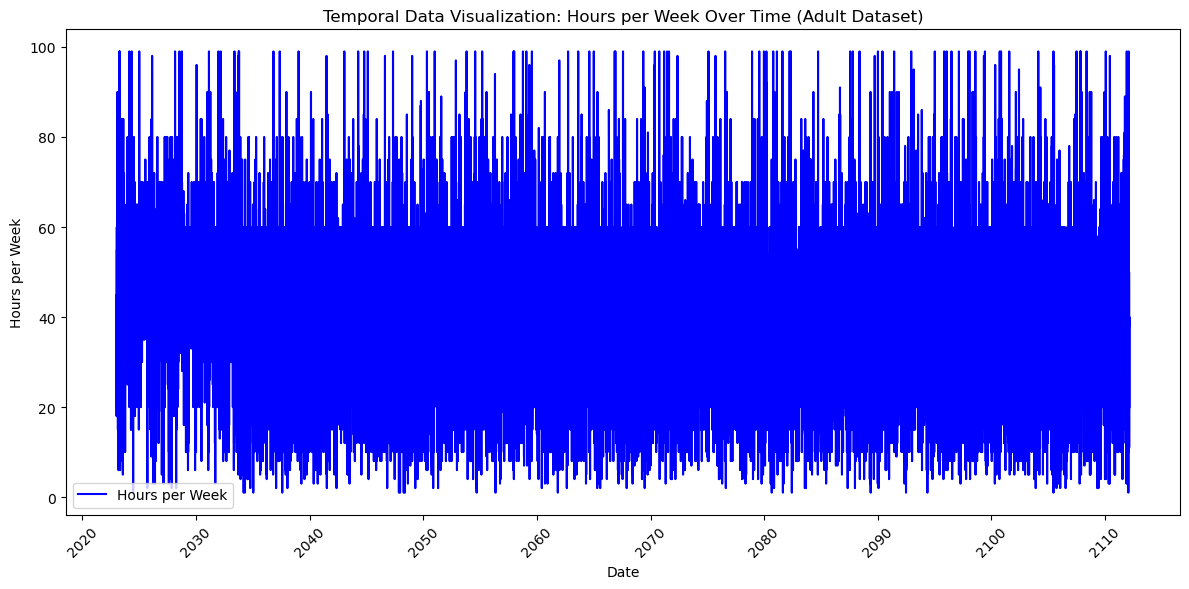

In [33]:

adult['date'] = pd.date_range(start='2023-01-01', periods=len(adult), freq='D')


plt.figure(figsize=(12, 6))
sns.lineplot(data=adult, x='date', y='hours.per.week', color='blue', label="Hours per Week")
plt.title("Temporal Data Visualization: Hours per Week Over Time (Adult Dataset)")
plt.xlabel("Date")
plt.ylabel("Hours per Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


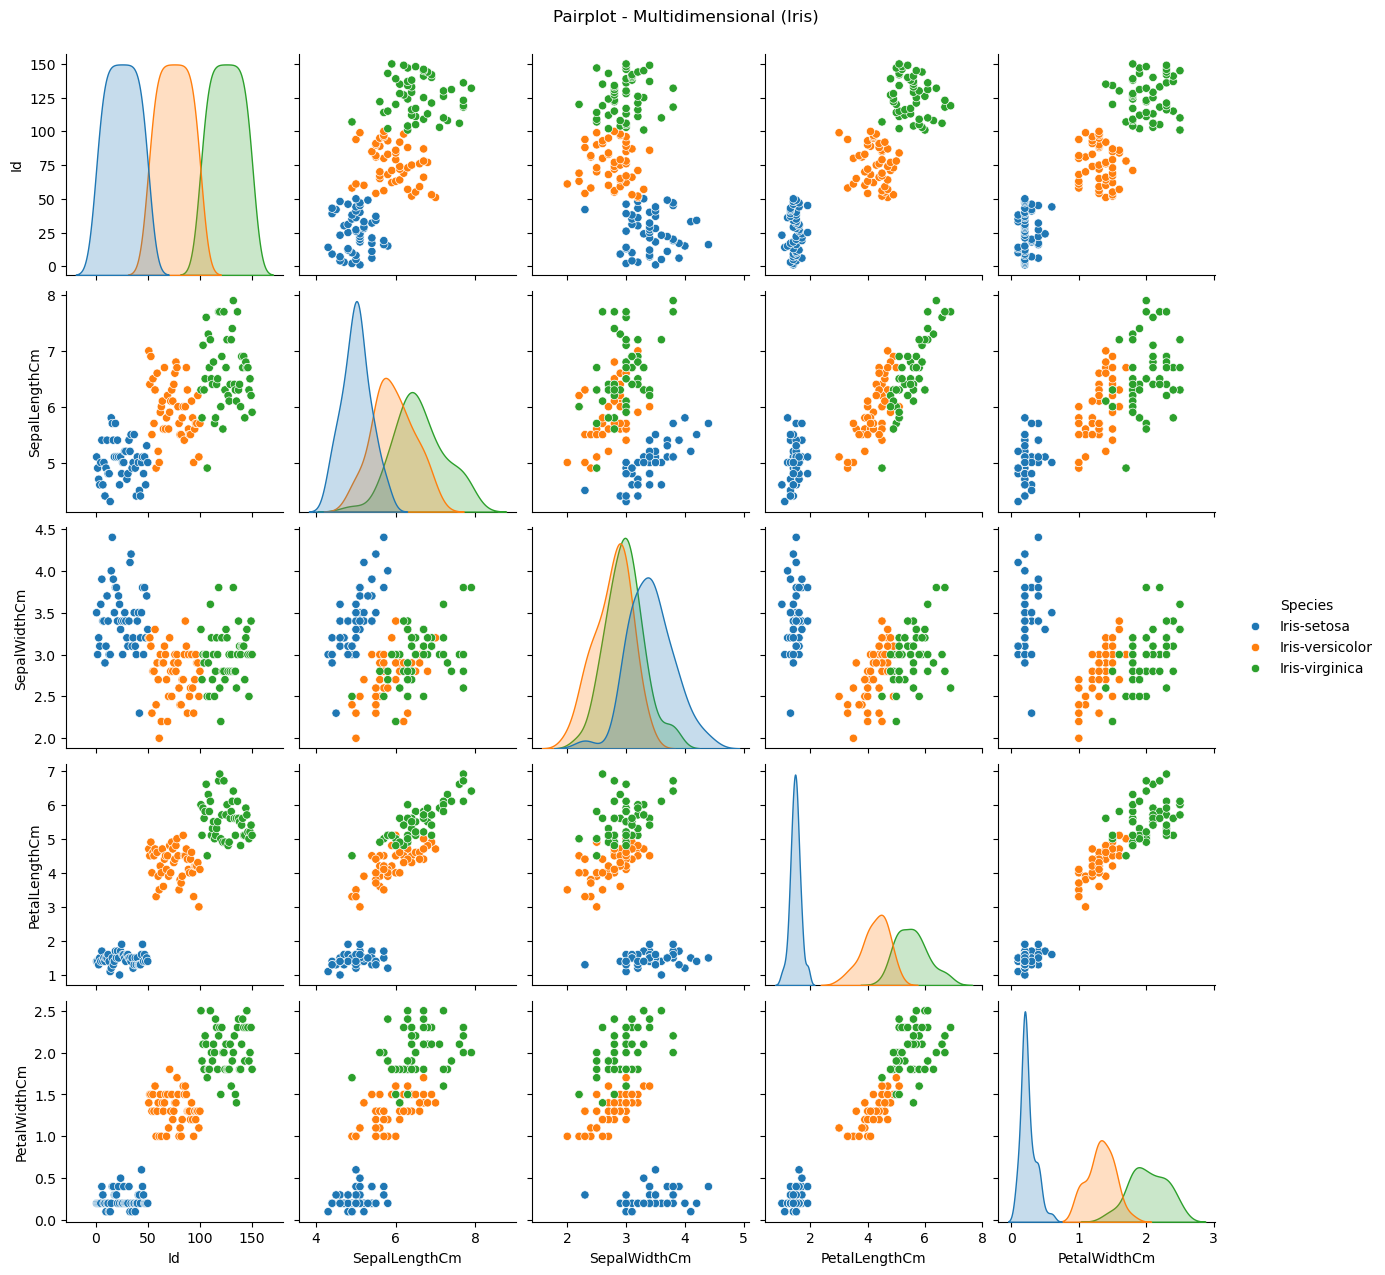

In [35]:
sns.pairplot(iris, hue="Species")
plt.suptitle("Pairplot - Multidimensional (Iris)", y=1.02)
plt.show()

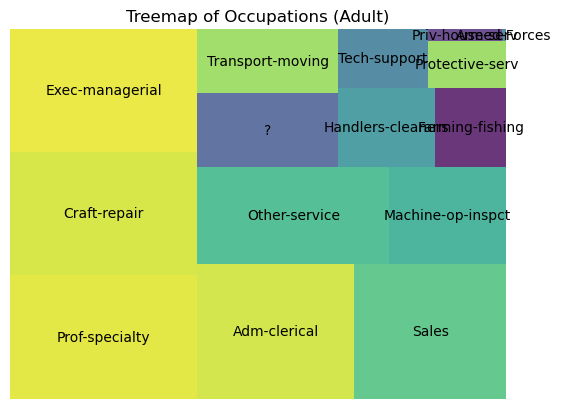

In [36]:
job_counts = adult["occupation"].value_counts()
squarify.plot(sizes=job_counts.values, label=job_counts.index, alpha=0.8)
plt.title("Treemap of Occupations (Adult)")
plt.axis('off')
plt.show()

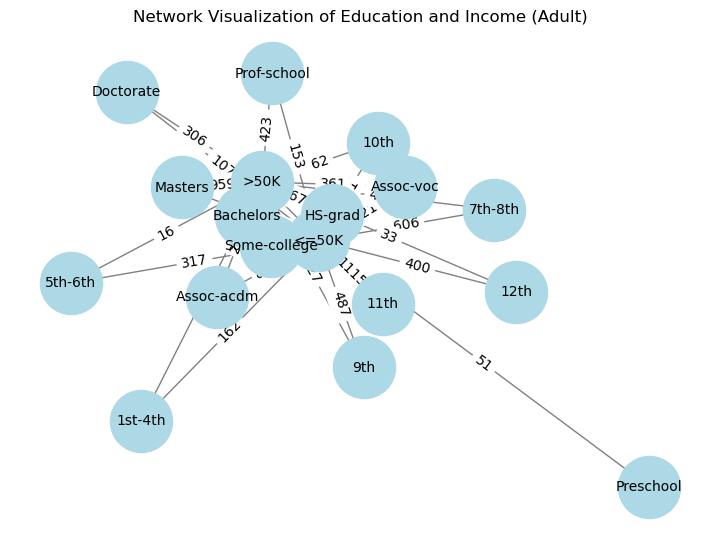

In [8]:
G = nx.Graph()
edu_income = adult.groupby(['education', 'income']).size().reset_index(name='count')
for _, row in edu_income.iterrows():
    G.add_edge(row['education'], row['income'], weight=row['count'])
plt.figure(figsize=(7, 5))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', edge_color='gray', font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Network Visualization of Education and Income (Adult)")
plt.show()